In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
from skimage import feature
from skimage import measure
%config InlineBackend.figure_format = 'svg'

In [37]:
img = cv2.imread('wrist.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

contrast = cv2.imread("wristaltered.jpg")

gray = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)

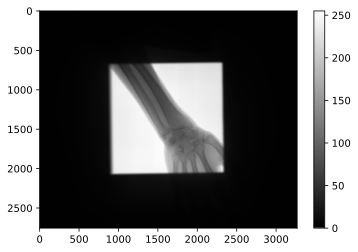

In [38]:
plt.imshow(img, cmap = 'gray')
plt.colorbar()
plt.show()

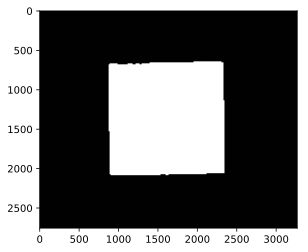

In [39]:
plt.imshow(gray, cmap = 'gray')
plt.show()

In [66]:
edges = cv2.Canny(img, 0, 50)

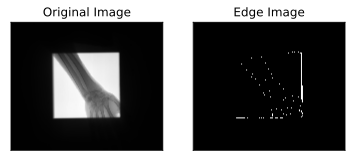

In [67]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [73]:
edge_skimage = feature.canny(img)

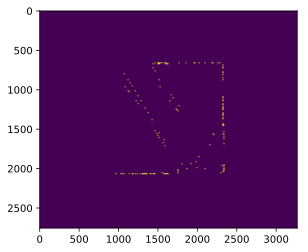

In [83]:
plt.imshow(edge_skimage)
plt.show()

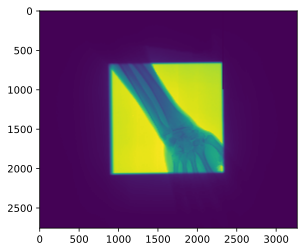

In [97]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)

xis = []
xfs = []
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    xis.append((x1,y1))
    xfs.append((x2,y2))

    cv2.line(gray,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(gray)
plt.show()